In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [24]:
get_cv_idxs?

In [17]:
PATH = "data/dogbreed/"
bs = 64
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)
files = !ls {PATH}train | head
files

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [18]:
get_cv_idxs??

In [19]:
sz = 299

In [20]:
label_df = pd.read_csv(label_csv)
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [21]:
files

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

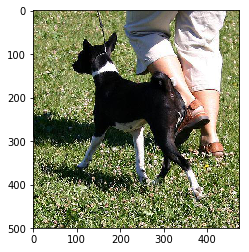

In [22]:
img = plt.imread(f'{PATH}train/{files[8]}')
plt.imshow(img);

In [23]:
arch = resnext50

In [24]:
label_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [25]:
# data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', suffix='.jpg', tfms=tfms, test_name='test', val_idxs=val_idxs, bs=bs)

In [26]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size_d.values()))
row_sz[:5]

(500, 500, 400, 500, 231)

In [27]:
ImageClassifierData.from_csv?

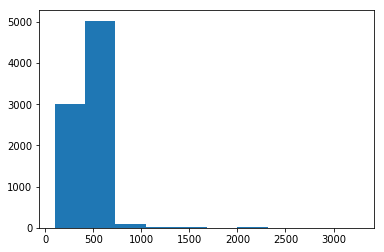

In [28]:
plt.hist(row_sz);

In [29]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test', num_workers=4, val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340, 'tmp')

In [30]:
data = get_data(sz, bs)

A Jupyter Widget


 23%|██▎       | 1909/8178 [00:18<01:01, 102.75it/s]


 45%|████▍     | 3665/8178 [00:37<00:46, 96.92it/s]


 66%|██████▋   | 5428/8178 [00:56<00:28, 95.83it/s]


 88%|████████▊ | 7205/8178 [01:15<00:10, 94.91it/s]


100%|█████████▉| 8177/8178 [01:27<00:00, 93.81it/s]
                                                   
 28%|██▊       | 580/2044 [00:08<00:22, 66.43it/s]


 99%|█████████▉| 2031/2044 [00:29<00:00, 69.02it/s]


                                                   
 16%|█▌        | 1618/10357 [00:18<01:42, 85.45it/s]


 38%|███▊      | 3931/10357 [00:36<01:00, 106.32it/s]


 66%|██████▌   | 6829/10357 [00:55<00:28, 123.51it/s]


 89%|████████▊ | 9175/10357 [01:13<00:09, 124.25it/s]


100%|█████████▉| 10331/10357 [01:27<00:00, 118.30it/s]
                                                      


In [31]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 5)


100%|██████████| 128/128 [01:29<00:00,  1.44it/s]

 88%|████████▊ | 28/32 [00:20<00:02,  1.37it/s]


100%|██████████| 32/32 [00:23<00:00,  1.39it/s]

 93%|█████████▎| 151/162 [01:50<00:08,  1.37it/s]


100%|██████████| 162/162 [01:57<00:00,  1.38it/s]


A Jupyter Widget


  1%|          | 1/128 [00:01<03:42,  1.75s/it, loss=5.22]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



 87%|████████▋ | 111/128 [00:11<00:01,  9.81it/s, loss=1.36]


 95%|█████████▌| 122/128 [00:12<00:00,  9.67it/s, loss=1.19]
                                                            [ 0.       1.19342  0.49127  0.89675]

 70%|███████   | 90/128 [00:01<00:00, 53.49it/s, loss=0.597]


 97%|█████████▋| 124/128 [00:02<00:00, 60.43it/s, loss=0.529]
                                                             [ 1.       0.529    0.34655  0.91198]

 60%|██████    | 77/128 [00:01<00:00, 59.94it/s, loss=0.378]


 94%|█████████▍| 120/128 [00:01<00:00, 69.69it/s, loss=0.369]
                                                             [ 2.       0.36915  0.30195  0.91777]

 50%|█████     | 64/128 [00:01<00:01, 52.06it/s, loss=0.301]


100%|██████████| 128/128 [00:01<00:00, 65.63it/s, loss=0.282]
                                                             [ 3.       0.28165  0.2794   0.92074]

 34%|███▍      | 44/128 [00:01<00:02, 28.81it/s, loss=0.239]


100%|██████████| 128/128 [00:03<00:00, 35.86it/s, loss=0.214]
                                                             [ 4.       0.21447  0.26647  0.92712]



In [32]:
learn.precompute = False

In [33]:
learn.precompute

False

In [34]:
learn.fit(1e-2, 2, cycle_len=1)

A Jupyter Widget


  0%|          | 0/128 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



 50%|█████     | 64/128 [00:45<00:45,  1.40it/s, loss=0.294]


 99%|█████████▉| 127/128 [01:31<00:00,  1.38it/s, loss=0.295]


100%|██████████| 128/128 [01:31<00:00,  1.39it/s, loss=0.295]
                                                             [ 0.       0.29491  0.25993  0.92467]

 48%|████▊     | 62/128 [00:46<00:49,  1.33it/s, loss=0.29]


 98%|█████████▊| 126/128 [01:29<00:01,  1.40it/s, loss=0.271]


100%|██████████| 128/128 [01:31<00:00,  1.41it/s, loss=0.273]
                                                             [ 1.       0.2732   0.25784  0.92516]



A Jupyter Widget


  0%|          | 0/128 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



 50%|█████     | 64/128 [00:47<00:47,  1.36it/s, loss=0.261]


 87%|████████▋ | 111/128 [01:20<00:12,  1.38it/s, loss=1.06] 

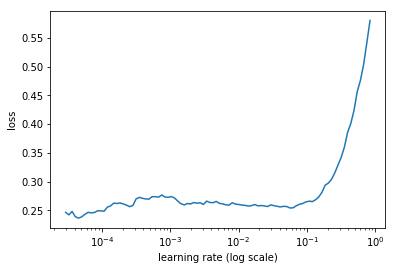

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [35]:
learn.lr_find()
learn.sched.plot()

In [43]:
learn.save('299_pre')

A Jupyter Widget

  0%|          | 0/128 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


 87%|████████▋ | 111/128 [01:20<00:12,  1.39it/s, loss=1.11] 

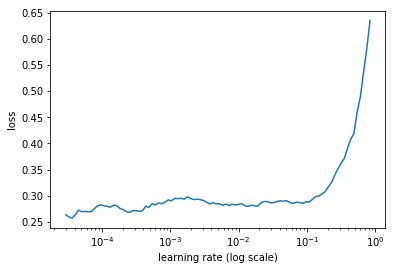

In [44]:
learn.lr_find()
learn.sched.plot()

In [ ]:
learn.fit(0.2, 5, cycle_len=1)

A Jupyter Widget

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



  6%|▋         | 8/128 [00:07<01:54,  1.05it/s, loss=0.317]


Exception in thread Thread-21:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




  6%|▋         | 8/128 [00:08<02:04,  1.04s/it, loss=0.316]


Exception in thread Thread-22:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.89126  0.36328  0.88893]                        
 54%|█████▍    | 69/128 [00:50<00:43,  1.36it/s, loss=0.852]

In [42]:
# learn.set_data(get_data(299, bs))
learn.freeze()

A Jupyter Widget


100%|██████████| 162/162 [04:20<00:00,  1.61s/it]


In [43]:
learn.fit(1e-2, 3, cycle_len=1)

A Jupyter Widget

  0%|          | 0/128 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.72443  0.44076  0.86878]                        
[ 1.       0.70601  0.43431  0.86634]                        
[ 2.       0.6846   0.4285   0.87516]                        



In [44]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

  0%|          | 0/128 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.6801   0.42613  0.86738]                        
[ 1.       0.662    0.41848  0.86934]                        
[ 2.       0.64044  0.41585  0.8762 ]                        
[ 3.       0.63     0.41536  0.87383]                        
[ 4.       0.61654  0.41155  0.87822]                        
[ 5.       0.58752  0.40794  0.87575]                        
[ 6.       0.55698  0.40714  0.87767]                        



In [45]:
log_preds, y = learn.TTA()
probs = np.exp(log_preds)
accuracy(log_preds, y), metrics.log_loss(y, probs)

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(0.88062622309197647, 0.39497373194704832)

In [46]:
learn.save('299_pre')

In [47]:
learn.fit(1e-2, 1, cycle_len=2)

A Jupyter Widget

  0%|          | 0/128 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.59369  0.40442  0.87428]                        
[ 1.       0.55485  0.39883  0.88018]                        



In [48]:
log_preds, y = learn.TTA()
probs = np.exp(log_preds)
accuracy(log_preds, y), metrics.log_loss(y, probs)

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(0.88062622309197647, 0.38870562634744393)

In [49]:
learn.save('299_pre')

In [39]:
log_preds = learn.predict()
log_preds.shape

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(2000, 2)

In [41]:
log_preds[:10]

array([[ -0.00056,  -7.49229],
       [ -0.00015,  -8.82248],
       [ -0.00006,  -9.71904],
       [ -0.00002, -10.95521],
       [ -0.00071,  -7.2539 ],
       [ -0.0001 ,  -9.20444],
       [ -0.00001, -12.00614],
       [ -0.     , -12.23054],
       [ -0.00002, -10.94995],
       [ -0.00014,  -8.85836]], dtype=float32)

In [42]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [43]:
def rand_by_mask(mask):
    return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct):
    return rand_by_mask((preds == data.val_y) == is_correct)

In [92]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [93]:
def plots(ims, figsize=(12, 6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i])

In [94]:
def load_img_id(ds, idx):
    return np.array(PIL.Image.open(PATH+ds.fnames[idx]))
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds, x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16, 8))

correctly classified


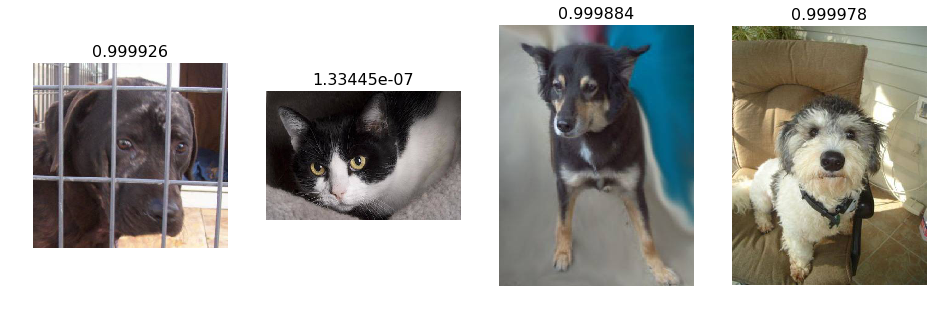

In [97]:
plot_val_with_title(rand_by_correct(True), "correctly classified")

Incorrectly classified


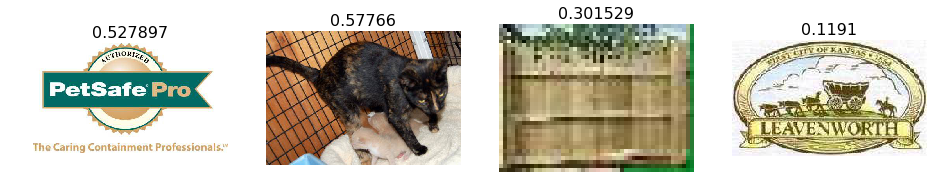

In [98]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [101]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct):
    mult = -1 if (y == 1) == is_correct else 1
    return most_by_mask((preds == data.val_y) == is_correct & (data.val_y == y), mult)

Most correct cats


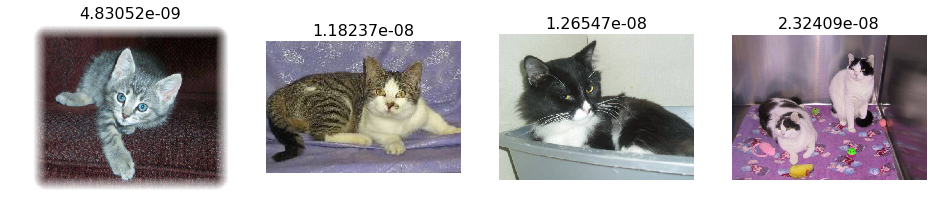

In [102]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


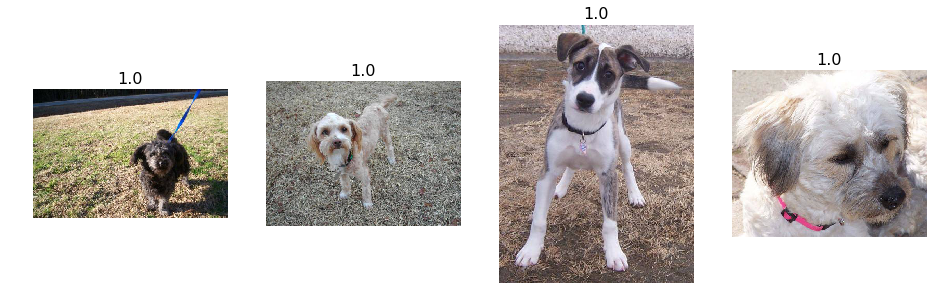

In [103]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect dogs


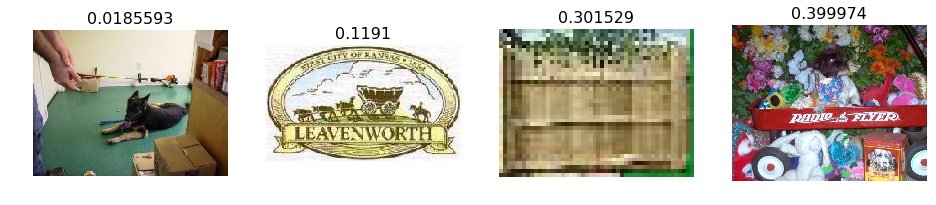

In [104]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most incorrect cats


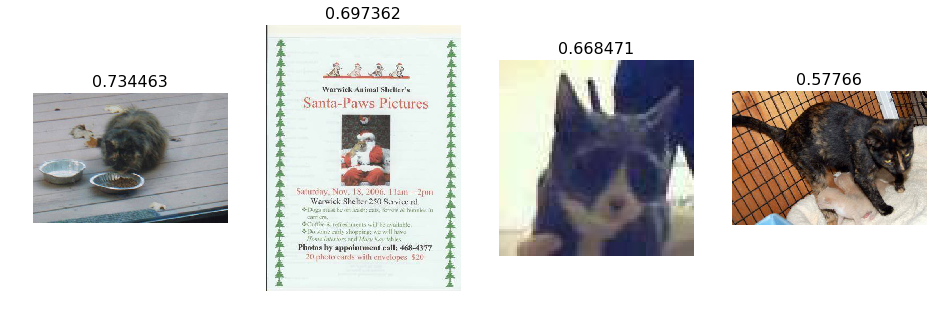

In [105]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most uncertain predictions


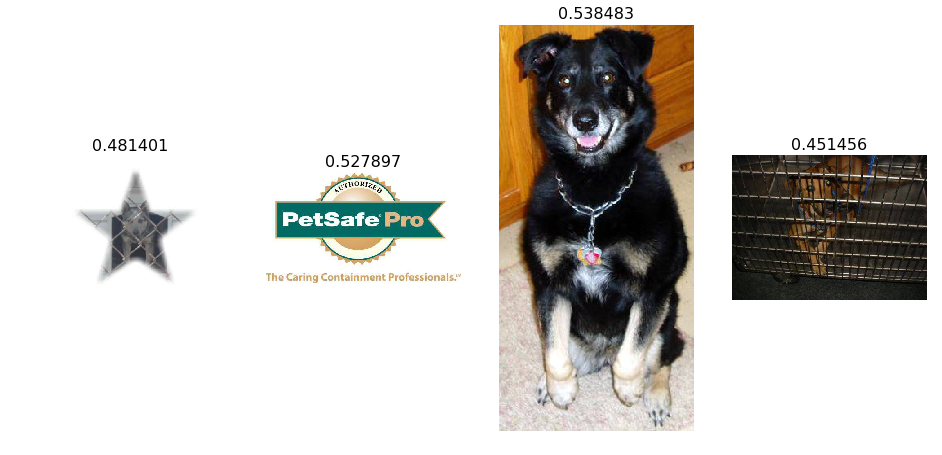

In [106]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [56]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf = learn.lr_find()

A Jupyter Widget

  6%|▌         | 20/360 [00:00<00:07, 44.75it/s, loss=0.988]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


 84%|████████▍ | 302/360 [00:02<00:00, 137.70it/s, loss=0.508]


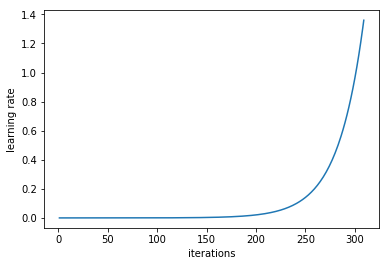

In [69]:
learn.sched.plot_lr()

In [58]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

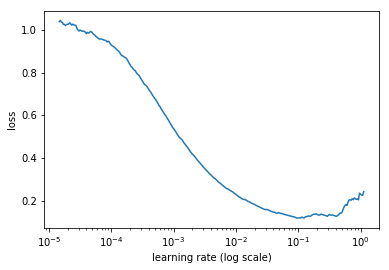

In [70]:
learn.sched.plot()

In [71]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=4)
    x, _ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [72]:
ims = np.stack([get_augs() for i in range(6)])

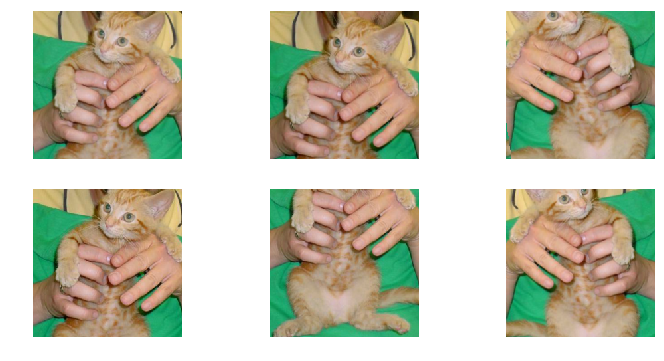

In [73]:
plots(ims, rows=2)

In [74]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [75]:
learn.fit(1e-2, 1)

A Jupyter Widget

  4%|▍         | 16/360 [00:00<00:09, 36.03it/s, loss=0.147]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.04838  0.03401  0.98584]                          



In [76]:
learn.precompute = False

In [77]:
learn.fit(1e-2, 3, cycle_len=1)

A Jupyter Widget

  0%|          | 1/360 [00:22<2:12:24, 22.13s/it, loss=0.0111]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.04644  0.03373  0.98584]                         
[ 1.       0.05375  0.03416  0.98633]                         
[ 2.       0.05135  0.03186  0.9873 ]                         



In [111]:
learn.fit_gen??

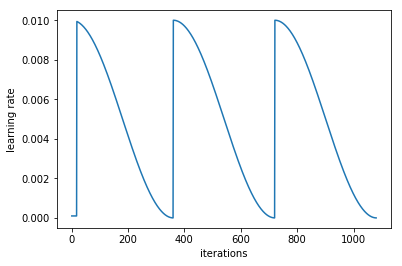

In [78]:
learn.sched.plot_lr()

In [79]:
learn.save('224_lastlayer')

In [80]:
learn.unfreeze()

In [81]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [82]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

  0%|          | 0/360 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.04857  0.03044  0.98779]                         
[ 1.       0.0415   0.02672  0.98975]                         
[ 2.       0.02875  0.02405  0.99072]                         
[ 3.       0.02744  0.02275  0.99121]                         
[ 4.       0.02251  0.02388  0.99121]                         
[ 5.       0.01953  0.02165  0.99219]                         
[ 6.       0.02444  0.02321  0.9917 ]                         



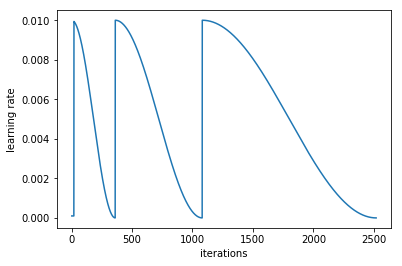

In [83]:
learn.sched.plot_lr()

In [84]:
learn.save('224_all')

In [85]:
log_preds, y = learn.TTA()
accuracy(log_preds, y)

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.99450000000000005

In [86]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:, 1])

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[995   5]
 [  6 994]]


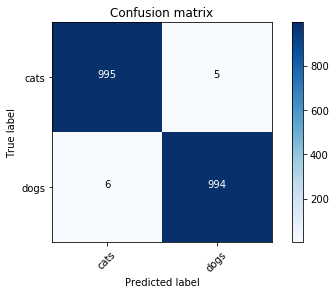

In [88]:
plot_confusion_matrix(cm, data.classes)

most incorrect cats


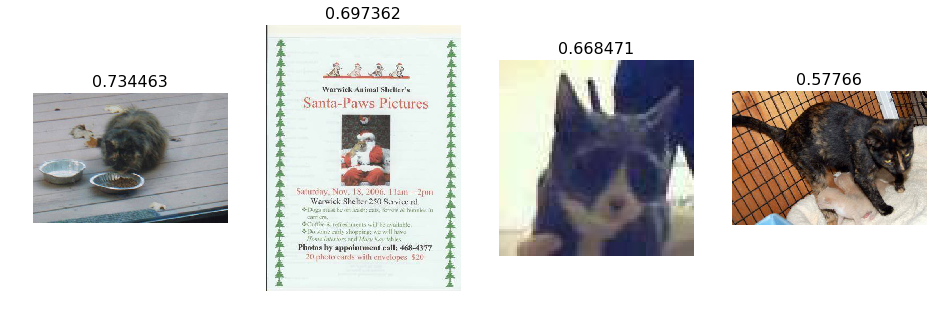

In [107]:
plot_val_with_title(most_by_correct(0, False), "most incorrect cats")

most incorrect dogs


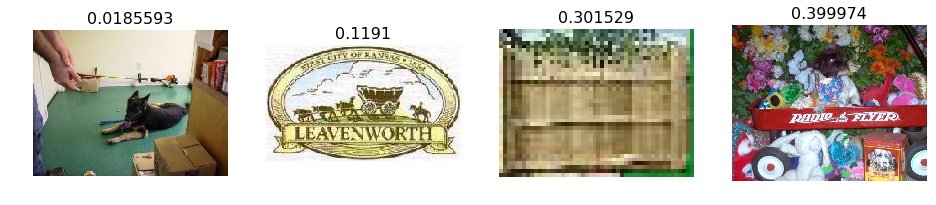

In [108]:
plot_val_with_title(most_by_correct(1, False), "most incorrect dogs")